## Iot Data Exporation

Here we will use the PEACH IoT datasets to try to find a hierarchy/patterns in people using their heart rate, body temperature, and sleep quality. We will begin by visualizing what data we have and use any immediate conclusions drawn from there to structure an unservised experiment where we try to discover clusters of users based on their IoT data.

In [1]:
%matplotlib inline
import pandas as pd
import os.path
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Load the data

The data files exists in data/raw/PEACHDate/IoT/ and represent data recorded over the first 25% of a year for 200,000 users. After loading, we will create tabels that contain the average values for each user across all the IoT features.

In [2]:
data_set_url = '../data/raw/PEACHData/IoT/'

# read the raw data from the csv files
body_temp = pd.read_csv(os.path.join(data_set_url, 'PEACH_bodyTempLog_1Q2015.csv'), parse_dates=['DateTime'])
heart_rate = pd.read_csv(os.path.join(data_set_url, 'PEACH_heartRateLog_1Q2015.csv'), parse_dates=['DateTime'])
sleep_quality = pd.read_csv(os.path.join(data_set_url, 'PEACH_sleepQualityLog_1Q2015.csv'), parse_dates=['DateTime'])

# select only the user_id and value columns
body_temp = body_temp[['UserId', 'Body_Temperature']]
increased_heart_rate = heart_rate[['UserId', 'Increased_Heart_Rate']]
resting_heart_rate = heart_rate[['UserId', 'User_Resting_Heart_Rate']]
sleep_quality = sleep_quality[['UserId', 'Sleep_Quality_Value']]

# computer the average value for each user over this span of time
avg_body_temp_by_user = body_temp.groupby(['UserId']).mean()
avg_increased_heart_rate = increased_heart_rate.groupby(['UserId']).mean()
avg_resting_heart_rate = resting_heart_rate.groupby(['UserId']).mean()
avg_sleep_quality = sleep_quality.groupby(['UserId']).mean()

# reformat the groupings so they are easier to plot
avg_body_temp_by_user.reset_index(level=0, inplace=True)
avg_increased_heart_rate.reset_index(level=0, inplace=True)
avg_resting_heart_rate.reset_index(level=0, inplace=True)
avg_sleep_quality.reset_index(level=0, inplace=True)

data_frames = []
data_frames.append(('Body_Temperature', avg_body_temp_by_user))
data_frames.append(('Increased_Heart_Rate', avg_increased_heart_rate))
data_frames.append(('User_Resting_Heart_Rate', avg_resting_heart_rate))
data_frames.append(('Sleep_Quality_Value', avg_sleep_quality))

### Visualize

Create scatter plots for heart rate, sleep quality, and body temperature for the average values for each user.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


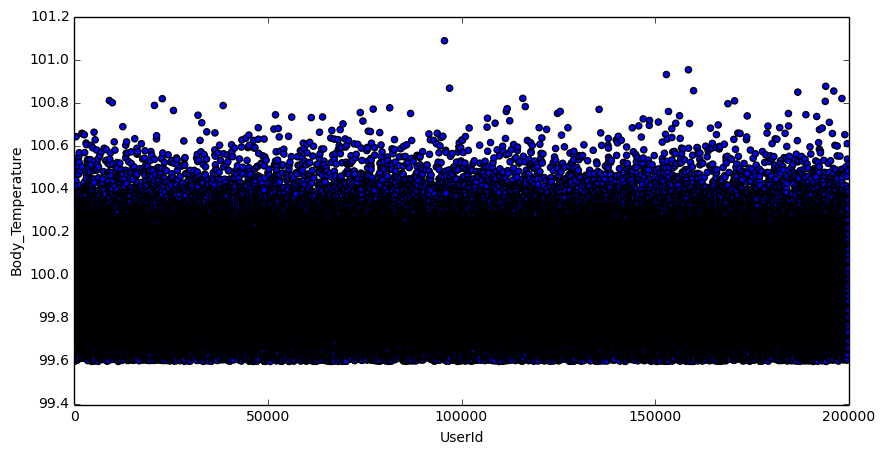

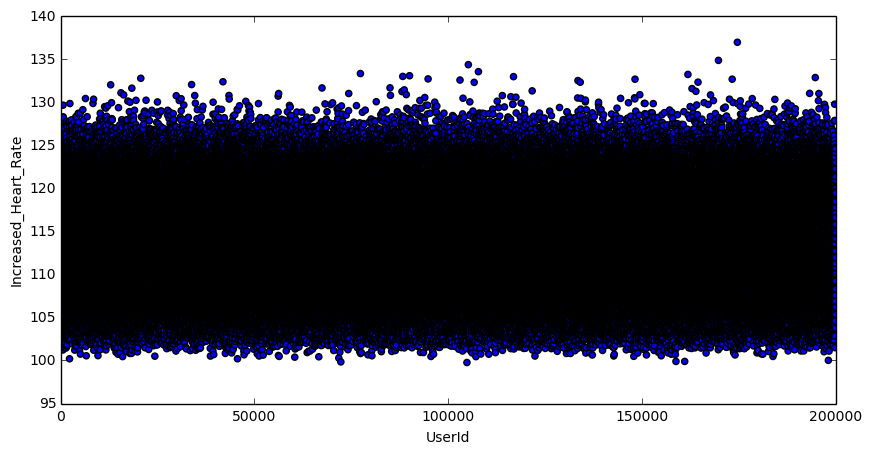

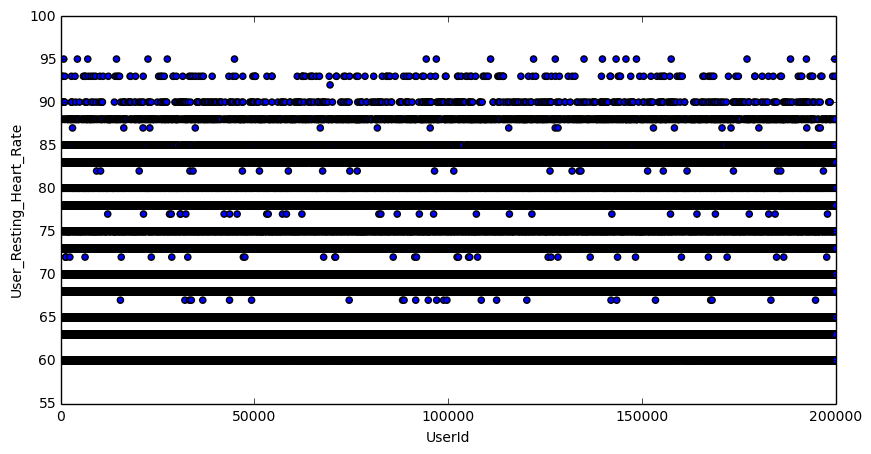

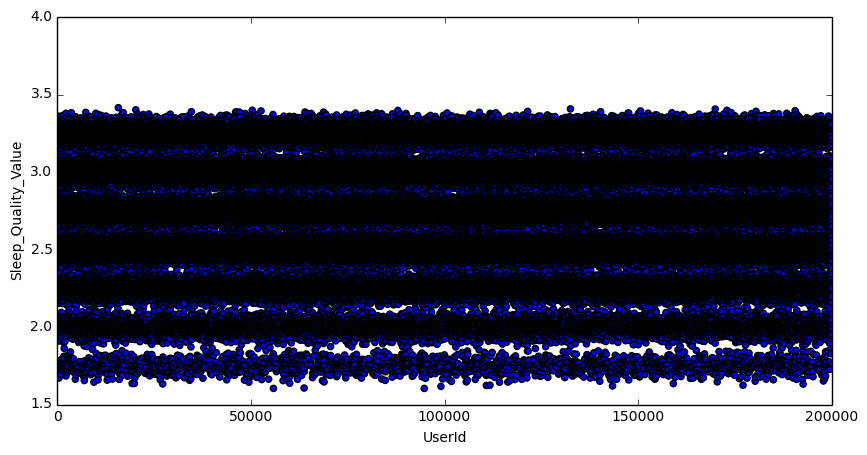

In [3]:
for i, thing in enumerate(data_frames):
    name, df = thing[0], thing[1]
    df.plot(figsize=(10, 5), kind='scatter', xlim=(0,200000), x='UserId', y=name)

## Vectorizing the data

In order to make our data more accessible, we will vectorize it and store it all in a matrix where each user is a vector with features body temperature, increased heart rate, resting heart rate, and sleep quality.

In [4]:
# matrix that will hold the vectorized data
data = np.zeros((200000, 4))

# iterature through our data frames and add the data
# to our matrix
for i, thing in enumerate(data_frames):
    name, df = thing[0], thing[1]
    for index, row in df.iterrows():
        userid = int(row['UserId'])
        value = row[name]
        data[userid][i] = value

For some reason the we do not have body temperatures recorded for all 200,000 users. Instead, we are going to replace these missing values with the average body temperature of a person 98.6 deg F.

In [5]:
zeros = np.setdiff1d(np.arange(200000), data.T[0].nonzero()[0])
body_temp_index = 0
for zero in zeros:
    data[zero][body_temp_index] = 98.6

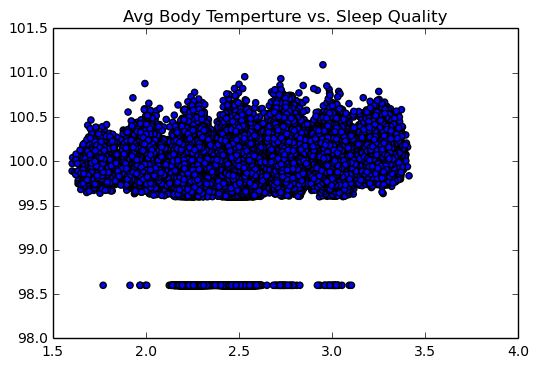

In [6]:
plt.scatter(data.T[3], data.T[0])
plt.title('Avg Body Temperture vs. Sleep Quality')
plt.show()

Not sure if this is due the data or if I'm doing something wrong but a lot of the users seem to have awfully high body temperatures. My guess is that this probably has something to do with how the data was taken. If the measurements were measureing surface temperature and not core temperature the values here could be inaccurate.

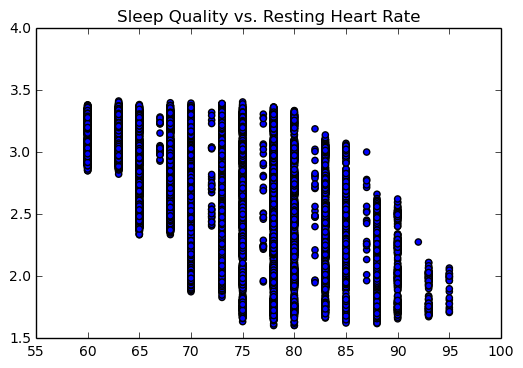

In [7]:
plt.scatter(data.T[2], data.T[3])
plt.title('Sleep Quality vs. Resting Heart Rate')
plt.show()

When graphing sleep quality against resting heart rate there seems to be a correlation in that people with lower resting heart rates have better sleep. However, people with RHR over 85 probably have some kind of heart condition.